In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from functools import partial
%load_ext autoreload
%autoreload 2

# Exploration of the data

## Checks
First, we want to check if the nodes are not duplicated for each transport.

In [2]:
graphs,nodes,city_names = get_all_city_graph("data")

In [3]:
nodes[0].head(10)

,name,city_center,city
stop_I,,,
1,Gawler Central Railway Station,0,adelaide
2,Gawler Oval Railway Station,0,adelaide
3,Gawler Railway Station,0,adelaide
4,Evanston Railway Station,0,adelaide
5,Tambelin Railway Station,0,adelaide
6,Kudla Railway Station,0,adelaide
7,Munno Para Railway Station,0,adelaide
8,Smithfield Railway Station,0,adelaide
9,Broadmeadows Railway Station,0,adelaide


In [4]:
final  = []
fcts = [("clustering", nx.clustering),("betweeness_centrality",partial(nx.betweenness_centrality,k=500)), ("degree_distribution",nx.degree),("eigenvector_centrality",partial(nx.eigenvector_centrality,max_iter=500)), ("katz_centrality",nx.katz_centrality),("closeness_centrality",nx.closeness_centrality)]
for g, node in zip(graphs, nodes):
    for attr, fct in fcts:
        node = add_attribute_to_name(node, attr, fct,g)
        if attr == fcts[-1][0]:
            final.append(node)

In [29]:
def plot_attributes(list_df, attribute_name, names,city_per_city=False,names_to_display=[]):
    def plot(df,title,ax=None):
        if ax is None:
            sns.kdeplot(df, x=attribute_name, hue="city_center",clip=(0.0, None))
            plt.title(title)
       
        else:
            sns.kdeplot(df, x=attribute_name, hue="city_center",clip=(0.0, None),ax=ax)
            ax.set_title(title)
        
        
    
    if city_per_city:
        fig, axs = plt.subplots(1,len(names_to_display))
        cpt = 0
        for gdf,name in zip(list_df,names):
            if name in names_to_display:
                plot(gdf, name, axs[cpt])
                
                if cpt > 0:
                    axs[cpt].get_legend().remove()
                    axs[cpt].set_ylabel("")
                cpt += 1
        plt.supxlabel(attribute_name)
        plt.suptitle("Distribution of "+attribute_name+" for different cities")
        plt.show()
    else:
        plot(pd.concat(list_df), "All cities")

AttributeError: 'Figure' object has no attribute 'set_xlabel'

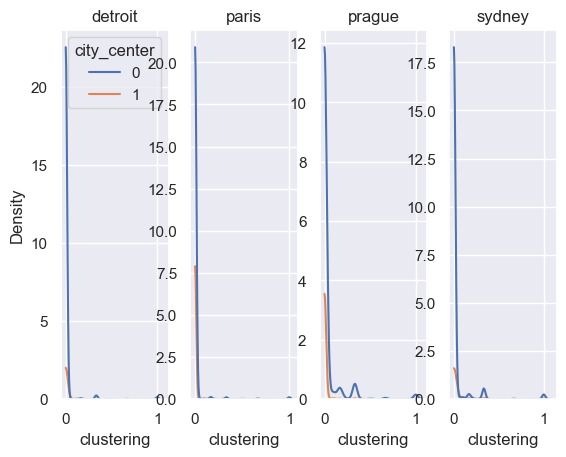

In [30]:
plot_attributes(final,"clustering",city_names,city_per_city=True,names_to_display=["detroit", "paris", "prague", "sydney"])


In [34]:
final[0].head(10)

,name,city_center,city,clustering,betweeness_centrality,degree_distribution,eigenvector_centrality
stop_I,,,,,,,
1,Gawler Central Railway Station,0,adelaide,0.000000,0.000000,1,5.003169e-07
2,Gawler Oval Railway Station,0,adelaide,0.000000,0.000002,2,2.727796e-06
3,Gawler Railway Station,0,adelaide,0.333333,0.000005,4,1.437200e-05
4,Evanston Railway Station,0,adelaide,1.000000,0.000000,2,5.328772e-06
5,Tambelin Railway Station,0,adelaide,0.333333,0.000002,4,1.468119e-05
6,Kudla Railway Station,0,adelaide,0.000000,0.000000,2,4.722731e-06
7,Munno Para Railway Station,0,adelaide,0.000000,0.000001,2,1.106779e-05
8,Smithfield Railway Station,0,adelaide,0.100000,0.000016,5,5.562035e-05
9,Broadmeadows Railway Station,0,adelaide,0.000000,0.000000,2,1.905344e-05
